In [7]:

# Cargar el archivo "demencia.csv"
df_demencia = pd.read_csv("demencia.csv")

# Cargar el archivo "no-demencia.csv"
df_no_demencia = pd.read_csv("no-demencia.csv")

# Ahora puedes trabajar con df_demencia y df_no_demencia, que contienen tus datos CSV


# Importando librerías
Se estará utilizando pandas para leer los archivos csv de demencia y no demencia, numpy para generar arreglos de dos dimesiones a partir de los data frames que nos genere pandas, PCA para preprocesar los datos, KMeans para crear grupos en los conjuntos de datos y matplotlib y seaborn para graficar los datos.

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo archivos de datos para almacenarlos en sus datasets correspondientes
Se estarán leyendo los archivos demencia.csv y no-demencia.csv y se imprimirá en pantalla las primeras lineas de cada conjunto de datos.

In [8]:
demencia = pd.read_csv("demencia.csv")
no_demencia = pd.read_csv("no-demencia.csv")

print(
    f"""
    *** Pacientes con demencia ***

    {demencia.head()}

    *** Pacientes sin demencia ***

    {no_demencia.head()}
    """
)


    *** Pacientes con demencia ***

       SEXO      EDAD      EDUC    EXAMEN  PUNTAJE  VOL_INTRA  VOL_CEREB    FACTOR
0     0  0.765306  0.521739  0.766667     0.25   0.837325   0.879331  0.659105
1     0  0.775510  0.521739  0.933333     0.25   0.867265   0.851852  0.636421
2     0  0.816327  0.521739  0.733333     0.25   0.847305   0.837515  0.651544
3     0  0.724490  0.695652  0.933333     0.25   0.677146   0.893668  0.814745
4     0  0.744898  0.695652  0.900000     0.50   0.681138   0.868578  0.810334

    *** Pacientes sin demencia ***

       SEXO      EDAD      EDUC    EXAMEN  PUNTAJE  VOL_INTRA  VOL_CEREB    FACTOR
0     0  0.887755  0.608696  0.900000      0.0   0.991517   0.831541  0.556396
1     0  0.897959  0.608696  1.000000      0.0   1.000000   0.813620  0.551985
2     1  0.897959  0.782609  0.933333      0.0   0.606287   0.848268  0.909893
3     1  0.918367  0.782609  0.900000      0.0   0.598802   0.857826  0.921235
4     0  0.816327  0.521739  0.933333      0.0   

# Preprocesando los datos, distribuyendo 8 componentes (uno por característica)
Se colocarán cada conjunto de datos en una matriz de numpy para posterior mente proprocesar los conjuntos en 8 componentes (sería un componente por caracteristica) y se imprimirá en pantalla los primeros 5 datos de cada conjunto después de haberlos transformado.

In [9]:
n_componentes = 8
np.set_printoptions(suppress=True)

d = (demencia).to_numpy()
nd = (no_demencia).to_numpy()

pca_demencia = PCA(n_components=n_componentes)
d_pca = pca_demencia.fit_transform(d)

pca_no_demencia = PCA(n_components=n_componentes)
nd_pca = pca_no_demencia.fit_transform(nd)

print(
    f"""
    *** Conjunto de datos de pacientes con demencia transformados con PCA ***

    {d_pca[:5]}

    *** Conjunto de datos de pacientes sin demencia transformados con PCA ***

    {nd_pca[:5]}

    """
)


    *** Conjunto de datos de pacientes con demencia transformados con PCA ***

    [[-0.42042163  0.00129992 -0.08398736 -0.06175276 -0.11459104 -0.01618469
   0.03122573  0.00090618]
 [-0.43104847 -0.13181042 -0.01211409  0.00451316 -0.15473017 -0.00989325
   0.00029727  0.00814893]
 [-0.42047618  0.03086965 -0.09494769 -0.06777919 -0.1294634   0.04580959
   0.00841836  0.00292503]
 [-0.40866382 -0.13904714  0.00436482  0.00353795  0.16171674 -0.04710486
   0.00777933 -0.00355838]
 [-0.39984981  0.0307443   0.09599514  0.16834935  0.14927965 -0.0490033
  -0.00009508 -0.0010165 ]]

    *** Conjunto de datos de pacientes sin demencia transformados con PCA ***

    [[ 0.72500881  0.03039582 -0.21732041 -0.0079698   0.02581824  0.05457285
  -0.03776517  0.03206854]
 [ 0.72630817  0.04022908 -0.23174094 -0.00664324 -0.02364811 -0.02634903
  -0.0032291   0.03660778]
 [-0.35248877  0.08058667  0.09667121  0.19406283  0.01460405  0.03028185
  -0.00707754  0.00932693]
 [-0.35486038  0.0763431

# Agrupando en 2 los datos de cada conjunto y obteniendo las etiquetas de los conjuntos

Se agruparán cada conjunto de datos en dos grupos a través de KMeans y usando los conjuntos de datos (o data frames) originales y se imprimirá en pantalla los primeros 5 conjuntos de etiquetas de cada conjunto.

In [10]:
n_grupos = 2

kmeans_d = KMeans(n_clusters=n_grupos)
kmeans_nd = KMeans(n_clusters=n_grupos)

d_clusters = kmeans_d.fit_predict(demencia)
nd_clusters = kmeans_nd.fit_predict(no_demencia)

print(f"""
    *** Primeras etiquetas del conjunto demencia ***

    {kmeans_d.labels_[:10]}

    *** Primeras etiquetas del conjunto no demencia ***

    {kmeans_nd.labels_[:10]}
""")


    *** Primeras etiquetas del conjunto demencia ***

    [1 1 1 1 1 1 1 1 0 0]

    *** Primeras etiquetas del conjunto no demencia ***

    [1 1 0 0 1 1 1 0 0 0]



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Mostrando los centros de los datos en cada conjunto
Se agruparán los conjuntos de datos de acuerdo a las etiquetas que se nos da anteriormente al usar KMeans.

En está parte del código se nos da los centros de los grupos de los conjuntos de datos originales.

In [11]:
grupo_d = demencia.groupby(d_clusters)
grupo_nd = no_demencia.groupby(nd_clusters)

print(f"""
=== Centros de los grupos los conjuntos ==
    *** Con demencia ***

{grupo_d.mean()}

    *** Sin demencia ***

{grupo_nd.mean()}
""")


=== Centros de los grupos los conjuntos ==
    *** Con demencia ***

   SEXO      EDAD      EDUC    EXAMEN   PUNTAJE  VOL_INTRA  VOL_CEREB   FACTOR
0   1.0  0.786735  0.557971  0.789444  0.354167   0.688856   0.860753  0.80774
1   0.0  0.772188  0.619818  0.817442  0.322674   0.778130   0.852338  0.71682

    *** Sin demencia ***

   SEXO      EDAD      EDUC    EXAMEN   PUNTAJE  VOL_INTRA  VOL_CEREB  \
0   1.0  0.787296  0.657230  0.976486  0.000000   0.705051   0.890741   
1   0.0  0.784209  0.660727  0.969399  0.008197   0.833399   0.873436   

     FACTOR  
0  0.789139  
1  0.668826  



# Mostrando las instancias por grupo de cada conjunto
Se imprimirán el número de instancias por grupo de cada conjunto de datos.

In [12]:
print(f"""
=== Instancias por grupo de los conjuntos ==
    *** Con demencia ***

    {grupo_d.count()}

    *** Sin demencia ***

    {grupo_nd.count()}
""")


=== Instancias por grupo de los conjuntos ==
    *** Con demencia ***

       SEXO  EDAD  EDUC  EXAMEN  PUNTAJE  VOL_INTRA  VOL_CEREB  FACTOR
0    60    60    60      60       60         60         60      60
1    86    86    86      86       86         86         86      86

    *** Sin demencia ***

       SEXO  EDAD  EDUC  EXAMEN  PUNTAJE  VOL_INTRA  VOL_CEREB  FACTOR
0   129   129   129     129      129        129        129     129
1    61    61    61      61       61         61         61      61



# Realizando una gráfica de dispersión reflejando los dos primeros componentes, utilizando las etiquetas de agrupamiento como colores
Se harán gráficas combinadas (es decir las dos gráficas de presentarán en una misma ventana) el axs[0] corresponderá a la representación de datos de los Pacientes con demencia y el ax[1] corresponderá a la representación de datos de los Pacientes sin demencia en gráficas de dispersión.

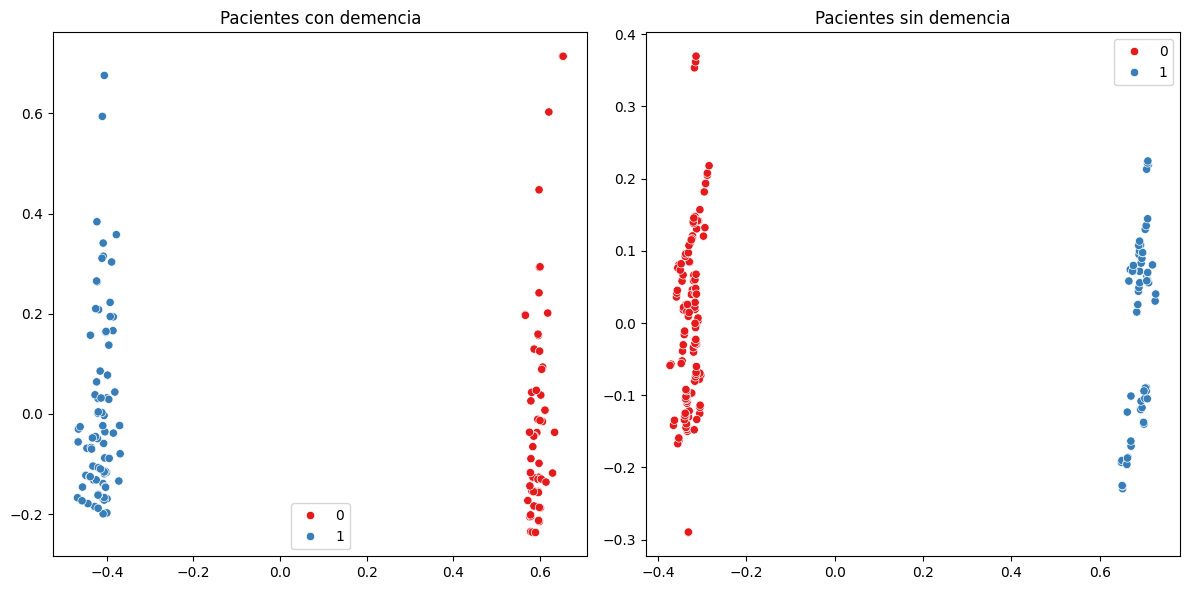

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x=d_pca[:, 0], y=d_pca[:, 1], hue=d_clusters, palette="Set1", ax=axs[0])
axs[0].set_title("Pacientes con demencia")

sns.scatterplot(x=nd_pca[:, 0], y=nd_pca[:, 1], hue=nd_clusters, palette="Set1", ax=axs[1])
axs[1].set_title("Pacientes sin demencia")

plt.tight_layout()
plt.show()